In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, GRU, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import accuracy_score

# Predict Netflix Stock Market Price Using Gated Recurrent Unit

In [4]:
df=pd.read_csv(r"C:\Users\win10\Downloads\DA\NFLX.csv")
# check the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

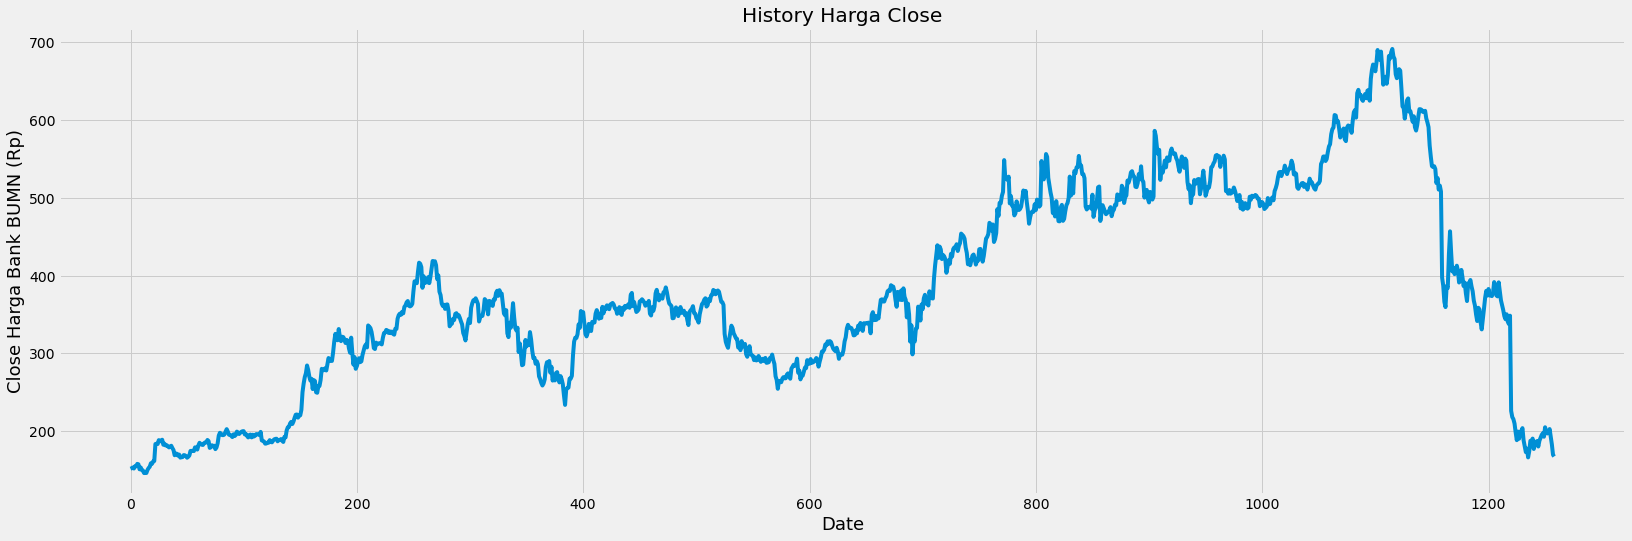

In [8]:
plt.figure(figsize=(25,8))
plt.title('History Harga Close')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Harga Bank BUMN (Rp)',fontsize=18)
plt.show()

In [9]:
data=df.filter({'Close'})
dataset= data.values
training_data_len = math.ceil(len(dataset)*0.8)

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [11]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [13]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
modelGRU = Sequential() 
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(GRU(units=50)) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)                1

In [15]:
modelGRU.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
# fit the data using GRU Model
modelGRU.fit(x_train,y_train,batch_size=1, epochs=10)

Epoch 1/10
948/948 [==============================] - 304s 321ms/step - loss: 0.0062
Epoch 2/10
948/948 [==============================] - 240s 253ms/step - loss: 0.0037
Epoch 3/10
948/948 [==============================] - 261s 276ms/step - loss: 0.0034
Epoch 4/10
948/948 [==============================] - 244s 258ms/step - loss: 0.0030
Epoch 5/10
948/948 [==============================] - 244s 257ms/step - loss: 0.0027
Epoch 6/10
948/948 [==============================] - 241s 254ms/step - loss: 0.0026
Epoch 7/10
948/948 [==============================] - 260s 274ms/step - loss: 0.0022
Epoch 8/10
948/948 [==============================] - 250s 264ms/step - loss: 0.0022
Epoch 9/10
948/948 [==============================] - 243s 257ms/step - loss: 0.0018
Epoch 10/10
948/948 [==============================] - 239s 252ms/step - loss: 0.0016


In [17]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
#GRU predictions
predictions=modelGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
#GRU RMSE for checking loss value
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

34.520205506215135

<ipython-input-21-6be46560e9cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


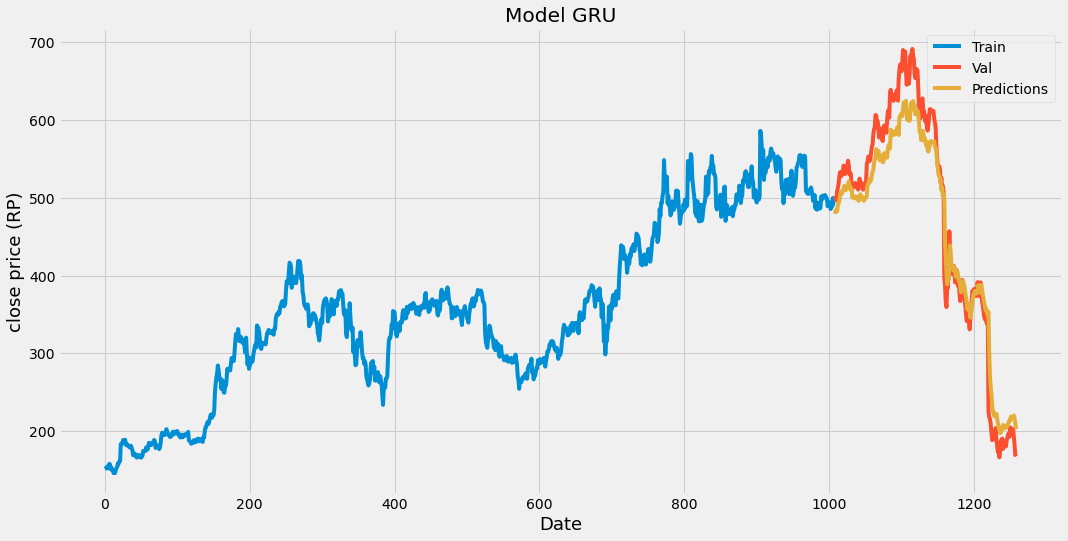

In [21]:
# Plotting data valid,training,and predictions using matplotlib
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model GRU')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price (RP)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='upper right')
plt.show()

# Predict  Netflix stock market price using svm 

In [3]:
# Import svm from sklearn
from sklearn.svm import SVR

In [4]:
# Import Python Librariesimport numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import datetime as dt
df1 = pd.read_csv(r"C:\Users\win10\Downloads\DA\NFLX.csv", parse_dates=['Date'], index_col=['Date'])


In [21]:
# chek the null values
df1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df = df1[['Close']]
df[['Close']].tail(15)

,Close
Date,
2022-05-24,180.339996
2022-05-25,187.830002
2022-05-26,191.399994
2022-05-27,195.190002
2022-05-31,197.440002
2022-06-01,192.910004
2022-06-02,205.089996
2022-06-03,198.979996
2022-06-06,197.139999


In [6]:
#Create one more column Prediction shifted 15 days up. 
df['Prediction'] = df[['Close']].shift(-50)
#print data set
print(df)
print(df['Prediction'].isnull().sum())

                 Close  Prediction
Date                              
2017-06-15  151.759995  165.949997
2017-06-16  152.380005  167.119995
2017-06-19  153.399994  168.809998
2017-06-20  152.050003  174.690002
2017-06-21  155.029999  174.710007
...                ...         ...
2022-06-08  202.830002         NaN
2022-06-09  192.770004         NaN
2022-06-10  182.940002         NaN
2022-06-13  169.690002         NaN
2022-06-14  167.539993         NaN

[1259 rows x 2 columns]
50


<ipython-input-6-c40c57944625>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-50)


In [7]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
#Remove the last 15 rows
X = X[:-50]
print(X)

[[151.759995]
 [152.380005]
 [153.399994]
 ...
 [381.470001]
 [374.589996]
 [373.470001]]


In [8]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y = y[:-50]
print(y)

[165.949997 167.119995 168.809998 ... 182.940002 169.690002 167.539993]


In [9]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [11]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.6255831645744203


In [22]:
# drop forecast without prediction column
forecast = np.array(df.drop(['Prediction'],1))[-50:]
print(forecast)

[[391.5     ]
 [380.149994]
 [368.350006]
 [362.149994]
 [355.880005]
 [348.      ]
 [344.100006]
 [350.429993]
 [341.130005]
 [337.859985]
 [348.609985]
 [226.190002]
 [218.220001]
 [215.520004]
 [209.910004]
 [198.399994]
 [188.539993]
 [199.520004]
 [190.360001]
 [199.460007]
 [199.869995]
 [204.009995]
 [188.320007]
 [180.970001]
 [173.100006]
 [177.660004]
 [166.369995]
 [174.309998]
 [187.639999]
 [186.509995]
 [190.559998]
 [177.190002]
 [183.479996]
 [186.350006]
 [187.440002]
 [180.339996]
 [187.830002]
 [191.399994]
 [195.190002]
 [197.440002]
 [192.910004]
 [205.089996]
 [198.979996]
 [197.139999]
 [198.610001]
 [202.830002]
 [192.770004]
 [182.940002]
 [169.690002]
 [167.539993]]


In [24]:
# support vector model RBF predictions for the next 50 days
svm_prediction = svr.predict(forecast)
print(svm_prediction)

[226.06895499 330.51941141 359.629713   356.83918832 353.97641545
 348.06637043 325.51123377 347.65557761 332.19050358 357.04490597
 348.53823228 307.99920925 287.58780966 278.60721773 315.6525019
 205.47402217 278.23986562 195.65257642 302.32401511 193.96855752
 211.29072725 385.04869983 275.669126   197.24044742 193.36330829
 195.78621681 198.49656253 195.55443145 270.66225227 262.58197966
 302.93831239 194.92562485 192.24130961 260.07603374 269.74962467
 193.892176   271.67966179 296.64791583 208.73498344 241.10997414
 248.6005657  316.29467924 190.59401304 247.11794395 198.35384062
 430.98986183 254.46944858 193.61390121 195.33693886 194.77430444]
